# Load the libraries

In [213]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
from nltk.stem import WordNetLemmatizer
import re
import string
from nltk.stem import SnowballStemmer
from string import punctuation
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE
import gensim 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
import logging
from numpy import loadtxt
from sklearn.ensemble import RandomForestClassifier
from time import strptime
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.io import push_notebook, output_notebook
nltk.download('stopwords')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import gzip
import matplotlib.pyplot as plt
import nltk
import pickle
from bokeh.plotting import figure, show
from bokeh.io import push_notebook, output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from sklearn.manifold import TSNE
from bokeh.plotting import figure, show
from bokeh.io import push_notebook, output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from keras.utils import to_categorical
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.core import Reshape, Flatten
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score

[nltk_data] Downloading package stopwords to /Users/Azi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Read the Data

In [2]:
df=pd.read_csv('case_study_data.csv',error_bad_lines=False, encoding="ISO-8859-1")

In [27]:
df.shape

(268380, 4)

In [3]:
df.head()

,complaint_id,product_group,text
0,2815595,bank_service,On XX/XX/2017 my check # XXXX was debited from...
1,2217937,bank_service,I opened a Bank of the the West account. The a...
2,2657456,bank_service,wells fargo in nj opened a business account wi...
3,1414106,bank_service,A hold was placed on my saving account ( XXXX ...
4,1999158,bank_service,Dear CFPB : I need to send a major concern/com...


# TASK.1: EXPLORATORY ANALYSIS

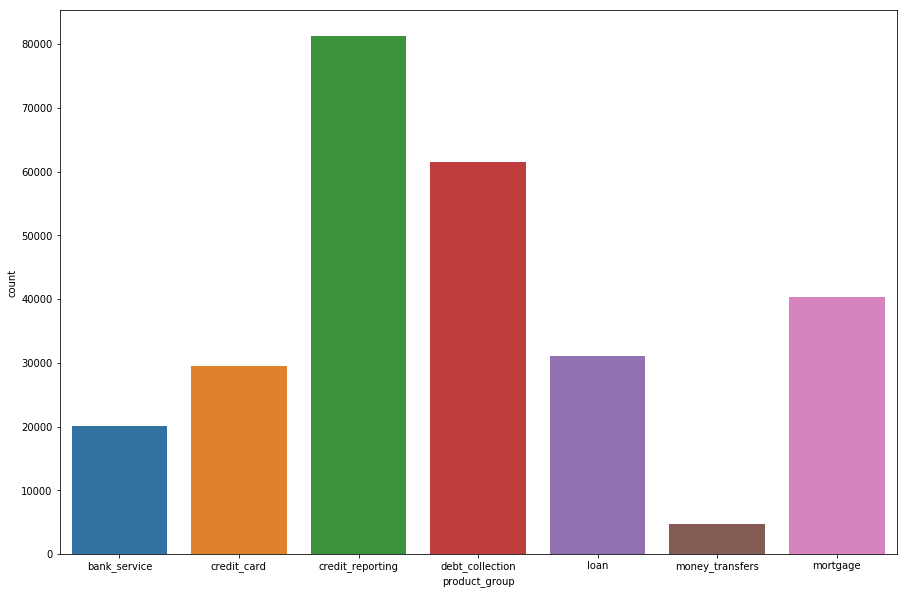

In [4]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="product_group", data=df)

# # Text preprocessing 

In [5]:
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    #text = [w for w in text if not w in stops and len(w) > 2]    
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"-", "", text)
    text = re.sub(r"xx", "", text)
    text = re.sub(r"an", "", text)
    text = re.sub(r"/", "", text)
    

    ## Stemming
    text = text.split()
    lemmatizer = WordNetLemmatizer()
    lem_words = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(lem_words)


    return text

### Count unique words for text courpes

In [255]:
list_word=list (list(df['text']))
count_word = Counter()
for xs in list_word:

    spl = xs.split(' ')
    for x in set(spl):
         count_word[x] += 1
    


In [254]:
len (count_word)

318511

In [243]:

def data_preprocessing(df):
 
    df['clean_text'] = df['text'].str.lower()
    df['clean_text'] = df['clean_text'].str.strip()
    df = df[df['clean_text'] != '??']
    df = df[df['clean_text'] != '']    
    df['clean_text'] = df['clean_text'].apply(clean_text)
    print ("Number of overall words befor cleaning",df['text'].apply(lambda x: len(x.split(' '))).sum())
    

    print ("Number of overall words after cleaning",df['clean_text'].apply(lambda x: len(x.split(' '))).sum())
    print(df.head())
    
    return df

## Split Data as train and test data set

In [244]:
Comments = data.clean_text
X = data.clean_text
y = data.product_group
my_tags = ['bank_service', 'credit_card', 'credit_reporting','debt_collection', 'loan', 'money_transfers', 'mortgage']
X_train_Comments,X_test_Comments, X_train_classic, X_test_classic, y_train_classic, y_test_classic = train_test_split(Comments,X, y, test_size=0.3, random_state = 42)

## CREATING MODELS- START WITH BASELINE AND SEE WHAT WE GET WITH NO MODIFICATIONS¶

In [241]:
def train_evalute_model(X_train_Comments,X_test_Comments, X_train_classic, X_test_classic, y_train_classic, y_test_classic ):
    nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
    nb.fit(X_train_classic, y_train_classic)
    y_pred_NB = nb.predict(X_test_classic)
    
    print('naive bayes' )
    print('accuracy %s' % accuracy_score( y_test_classic, y_pred_NB))
    print(classification_report(y_test_classic, y_pred_NB,target_names=my_tags))

    print (confusion_matrix( y_test_classic, y_pred_NB, ['bank_service', 'credit_card', 'credit_reporting',
       'debt_collection', 'loan', 'money_transfers', 'mortgage']))
    print ('###################################################')

    sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
    sgd.fit(X_train_classic, y_train_classic)
    y_pred_svm = sgd.predict(X_test_classic)
    
    print ('linear Support Vector Machine')

    print('accuracy %s' % accuracy_score(y_pred_svm, y_test_classic))
    print(classification_report(y_test_classic, y_pred_svm,target_names=my_tags))

    print (confusion_matrix( y_test_classic, y_pred_svm, ['bank_service', 'credit_card', 'credit_reporting',
       'debt_collection', 'loan', 'money_transfers', 'mortgage']))
    print ('###################################################')


    
    logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
    logreg.fit(X_train_classic, y_train_classic)

    y_pred_LR = logreg.predict(X_test_classic)
    print ('logestic Regression')

    print('accuracy %s' % accuracy_score( y_test_classic,y_pred_LR))
    print(classification_report(y_test_classic, y_pred_LR,target_names=my_tags))

    print (confusion_matrix( y_test_classic, y_pred_LR, ['bank_service', 'credit_card', 'credit_reporting',
       'debt_collection', 'loan', 'money_transfers', 'mortgage']))
    
    print ('###################################################')
    
    
    rfc = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier()),
               ])

    vectorizer = CountVectorizer(min_df=1)
    #rfc = RandomForestClassifier()
    rfc.fit(X_train_classic, y_train_classic)
    y_pred_rfc=rfc.predict((X_test_classic))
    print ('random forest')
    
    print('accuracy %s' % accuracy_score(y_test_classic, y_pred_rfc))
    print(classification_report(y_test_classic, y_pred_rfc,target_names=my_tags))
    print (confusion_matrix( y_test_classic, y_pred_LR, labels=['bank_service', 'credit_card', 'credit_reporting',
       'debt_collection', 'loan', 'money_transfers', 'mortgage']))
    print ('###################################################')
    
    
    xgboost = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', XGBClassifier()),
               ])

    xgboost.fit(X_train_classic, y_train_classic)
    y_pred_xgboost=xgboost.predict((X_test_classic))
    print ('XGboost')
    print('accuracy %s' % accuracy_score(y_test_classic, y_pred_xgboost))
    
    print(classification_report(y_test_classic, y_pred_xgboost,target_names=my_tags))
    
    print (confusion_matrix( y_test_classic, y_pred_xgboost, labels=['bank_service', 'credit_card', 'credit_reporting',
       'debt_collection', 'loan', 'money_transfers', 'mortgage']))
    
    
    return nb, sgd, logreg, rfc, xgboost
    

In [245]:

data=data_preprocessing(df)


Number of overall words befor cleaning 53407996
Number of overall words after cleaning 49847680
   complaint_id product_group  \
0       2815595  bank_service   
1       2217937  bank_service   
2       2657456  bank_service   
3       1414106  bank_service   
4       1999158  bank_service   

                                                text  \
0  On XX/XX/2017 my check # XXXX was debited from...   
1  I opened a Bank of the the West account. The a...   
2  wells fargo in nj opened a business account wi...   
3  A hold was placed on my saving account ( XXXX ...   
4  Dear CFPB : I need to send a major concern/com...   

                                          clean_text  
0  on 2017 my check wa debited from my checking a...  
1  i opened a bk of the the west account. the acc...  
2  well fargo in nj opened a business account wit...  
3  a hold wa placed on my saving account because ...  
4  dear cfpb : i need to send a major concerncomp...  


In [221]:


nb, sgd, logreg, rfc,xgboost=train_evalute_model(X_train_Comments,X_test_Comments, X_train_classic, X_test_classic, y_train_classic, y_test_classic )

naive bayes
accuracy 0.7476960528603721
                  precision    recall  f1-score   support

    bank_service       0.86      0.38      0.53      5898
     credit_card       0.74      0.54      0.63      8889
credit_reporting       0.68      0.92      0.78     24276
 debt_collection       0.74      0.78      0.76     18398
            loan       0.89      0.57      0.70      9391
 money_transfers       0.95      0.01      0.03      1478
        mortgage       0.83      0.91      0.87     12184

     avg / total       0.77      0.75      0.73     80514

[[ 2253   987  1270   645    48     1   694]
 [   57  4804  2758   951   110     0   209]
 [    7   108 22331  1296   234     0   300]
 [    4   104  3352 14365   243     0   330]
 [   11   112  1839  1537  5361     0   531]
 [  285   339   365   305    14    20   150]
 [   12    16   756   311    23     0 11066]]
###################################################
linear Support Vector Machine
accuracy 0.8059467918622848
         

# TASK3. USE DEEP LEARNING TO SEE IF IT IMPROVES YOUR RESULTS

# #Pre_training by GLOVE

In [80]:
MAX_SEQUENCE_LENGTH = 250
MAX_VOCAB_SIZE = 30000
EMBEDDING_DIM = 300

In [73]:

word2vec = {}
f = open('/Users/Azi/Citibank/glove.42B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word2vec[word] = coefs
f.close()
print('Found %s word vectors.' % len(word2vec))


Found 1917494 word vectors.


In [83]:
print('Filling pre-trained embeddings...')
num_words = max(MAX_VOCAB_SIZE, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i < MAX_VOCAB_SIZE:
        embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector

Filling pre-trained embeddings...


# Tokenizer strips punctuation out.

In [2]:
word_index = tokenizer.word_index     


In [85]:
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False)



In [116]:
data["label"]=data["product_group"].astype('category').cat.codes

### Deep Learning with Keras and tensorflow

In [118]:
X = data.clean_text
data["label"]=data["product_group"].astype('category').cat.codes
ylabel=data["label"]
X_train_nn, X_test_nn, train_label, test_label = train_test_split(X, ylabel, test_size=0.3, random_state = 42)

## tokenizer.fit_on_texts(X_train_nn)

##  Create  adictionary with the key being the word and the value being the token for that word.


## tokenizer.texts_to_sequences 
## The tokenizer to get text to sequences 

## pad_sequences  
## We need to have some level of uniformity of size. (Padding )
## After padding, list of sentences has been padded out into a matrix 

## tokenizer=Tokenizer(number_words=100, oov_tooken= <OOV>)
    
    
## by this script oov we are going to create a new token that I am going to use words that are not recognized.    

In [119]:
tokenizer.fit_on_texts(X_train_nn)
sequences_train = tokenizer.texts_to_sequences(X_train_nn)
tokenizer.fit_on_texts(X_test_nn)
sequences_test = tokenizer.texts_to_sequences(X_test_nn)


## X_train = pad_sequences(sequences_train,maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

In [120]:
X_train = pad_sequences(sequences_train,maxlen=MAX_SEQUENCE_LENGTH)
X_newVal = pad_sequences(sequences_test,maxlen=MAX_SEQUENCE_LENGTH)
y_train = to_categorical(np.asarray(train_label))
y_val = to_categorical(np.asarray(test_label))
print('Shape of X train and X validation tensor:', X_train.shape,X_newVal.shape)
print('Shape of label train and validation tensor:', y_train.shape, y_val.shape)

Shape of X train and X validation tensor: (187866, 250) (80514, 250)
Shape of label train and validation tensor: (187866, 7) (80514, 7)


In [99]:
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False)

## Develop LSTM by Keras 

In [122]:
model1 = Sequential()
model1.add(embedding_layer)
model1.add(Dense(30,  activation='relu'))
model1.add(LSTM(100))
model1.add(Dense(7, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.fit(X_train, y_train , epochs=3)

Epoch 1/3
187866/187866 [==============================] - 6162s - loss: 0.9142 - acc: 0.6786  
Epoch 2/3
187866/187866 [==============================] - 8062s - loss: 0.6005 - acc: 0.7963  
Epoch 3/3
187866/187866 [==============================] - 5350s - loss: 0.5398 - acc: 0.8163  


In [143]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 300)          34576800  
_________________________________________________________________
dense_13 (Dense)             (None, 250, 30)           9030      
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               52400     
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 707       
Total params: 34,638,937.0
Trainable params: 62,137.0
Non-trainable params: 34,576,800.0
_________________________________________________________________


In [257]:
model_json = model1.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model1.save_weights("LSTM_model.h5")
print("Saved model to disk")

Saved model to disk


In [240]:
predict_pretrin_google = model1.predict(X_newVal,verbose=1)


80514/80514 [==============================] - 391s   


In [225]:
tag_deeplearning=['0', '1', '2', '3', '4', '5', '6']
data.groupby(['product_group','label'])

In [171]:
predict_pretrin_google.shape 
model1_glove= predict_pretrin_google.argmax(axis=1)

actul_value= y_val.argmax(axis=1)

In [194]:
print ('LSTM along with pretraining by GLOVE')
print('accuracy %s' % accuracy_score( actul_value,model1_glove))
print(classification_report(actul_value,model1_glove,target_names=tag_deeplearning))
print (confusion_matrix( actul_value,model1_glove, labels=[0, 1, 2, 3, 4, 5, 6]))

LSTM along with pretraining by GLOVE
accuracy 0.7628735375214248
             precision    recall  f1-score   support

          0       0.66      0.74      0.70      5898
          1       0.73      0.63      0.68      8889
          2       0.79      0.83      0.81     24276
          3       0.76      0.77      0.76     18398
          4       0.73      0.66      0.69      9391
          5       0.70      0.27      0.39      1478
          6       0.82      0.88      0.85     12184

avg / total       0.76      0.76      0.76     80514

[[ 4347   675   243   219   119    72   223]
 [  803  5583  1292   756   197    48   210]
 [  182   571 20142  2175   699    11   496]
 [  180   360  2517 14088   773    20   460]
 [  196   208   941   955  6155    14   922]
 [  688   130    62    70    65   398    65]
 [  187    79   391   339   470     9 10709]]


## Load Word2Vec Welsfarho property by Gensim

### Word2vec is generated by genism with another python script

In [130]:
model_word2vec_welsfargo = gensim.models.Word2Vec.load("model_doc")

In [189]:

print ( len(model_word2vec_welsfargo.wv.vocab))
embedding_matrix3 = np.zeros((len(model_word2vec_welsfargo.wv.vocab), 50))
for i in range(len(model_word2vec_welsfargo.wv.vocab)):

    embedding_vector = model_word2vec_welsfargo.wv[model_word2vec_welsfargo.wv.index2word[i]]
    if embedding_vector is not None:
        embedding_matrix3[i] = embedding_vector
        
        

embedding_layer3 = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix3],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False) 

47099


In [239]:
model2 = Sequential()
model2.add(embedding_layer3 )
model2.add(Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'))
model2.add(Dense(20))
model2.add(Dense(50))
model2.add(MaxPooling1D(pool_size=40))
model2.add(Flatten(input_shape=(7, 2)))
model2.add(Dense(7, activation='sigmoid'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 250, 300)          34576800  
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 250, 100)          120100    
_________________________________________________________________
dense_21 (Dense)             (None, 250, 20)           2020      
_________________________________________________________________
dense_22 (Dense)             (None, 250, 50)           1050      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 6, 50)             0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 300)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 7)                 2107      
Total para

In [140]:
model2.fit(X_train, y_train , epochs=3)

Epoch 1/3
187866/187866 [==============================] - 497s - loss: 0.7841 - acc: 0.7321   
Epoch 2/3
187866/187866 [==============================] - 495s - loss: 0.6024 - acc: 0.7989   
Epoch 3/3
187866/187866 [==============================] - 485s - loss: 0.5540 - acc: 0.8126   


In [258]:
model_json1 = model2.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json1)
# serialize weights to HDF5
model2.save_weights("model2word2vec.h5")
print("Saved model to disk")

Saved model to disk


In [190]:
predict_pretrin_word2vec = model2.predict(X_newVal,verbose=1)

80480/80514 [============================>.] - ETA: 0s

In [193]:
model2_wv= predict_pretrin_word2vec.argmax(axis=1)
print ('LSTM along with Word2vec')
print('accuracy %s' % accuracy_score( actul_value,model2_wv))
print(classification_report(actul_value,model2_wv,target_names=tag_deeplearning))
print (confusion_matrix( actul_value,model2_wv, labels=[0, 1, 2, 3, 4, 5, 6]))

LSTM along with Word2vec
accuracy 0.7292147949424945
             precision    recall  f1-score   support

          0       0.69      0.60      0.64      5898
          1       0.71      0.60      0.65      8889
          2       0.74      0.82      0.78     24276
          3       0.68      0.76      0.72     18398
          4       0.74      0.63      0.68      9391
          5       0.63      0.18      0.28      1478
          6       0.82      0.81      0.81     12184

avg / total       0.73      0.73      0.72     80514

[[ 3554   730   600   541   101    74   298]
 [  476  5347  1667  1015   150    36   198]
 [  121   526 19856  2518   563     7   685]
 [  102   398  2871 13998   565    21   443]
 [  117   253  1171  1505  5881    10   454]
 [  522   173   181   252    35   265    50]
 [  241   144   597   757   625     9  9811]]
